In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow.keras.layers as layers

2024-02-06 18:09:18.966032: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 18:09:18.999747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 18:09:18.999774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 18:09:18.999792: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 18:09:19.006091: I tensorflow/core/platform/cpu_feature_g

In [2]:
def f(x):
    return 30*np.log(x[:,0]) - 0.01*x[:,0] + 0.01*x[:,1]
nb_points = 1_000_000

In [3]:
X = np.random.randint(low=1,high=10**3,size=(nb_points,2))
Y = f(X)

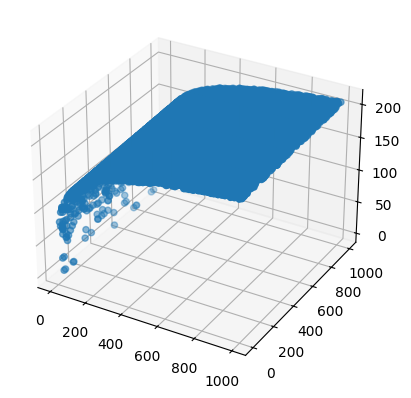

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:10_000,0], X[:10_000,1], Y[:10_000])

In [5]:
X_train, Y_train = X[:int(nb_points*0.8)], Y[:int(nb_points*0.8)]
X_valid, Y_valid = X[int(nb_points*0.8):], Y[int(nb_points*0.8):]

In [6]:
inputs = layers.Input(shape=(2,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='relu')(x)

model = tf.keras.Model(inputs, outputs, name="function_guesser")

2024-02-06 18:15:19.939850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 18:15:19.958412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 18:15:19.958548: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.losses.mean_squared_error, metrics=[tf.losses.mean_absolute_error])
model.summary()

Model: "function_guesser"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)          

In [8]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10


2024-02-06 18:27:11.129591: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


6250/6250 [==============================] - 14s 2ms/step - loss: 242.8069 - mean_absolute_error: 5.8721 - val_loss: 1.7146 - val_mean_absolute_error: 0.9720
Epoch 2/10
6250/6250 [==============================] - 15s 2ms/step - loss: 8.7673 - mean_absolute_error: 0.9827 - val_loss: 0.8127 - val_mean_absolute_error: 0.6725
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.2482 - mean_absolute_error: 0.7028 - val_loss: 2.1468 - val_mean_absolute_error: 0.9553
Epoch 4/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.9465 - mean_absolute_error: 0.6080 - val_loss: 3.0307 - val_mean_absolute_error: 1.3963
Epoch 5/10
6250/6250 [==============================] - 13s 2ms/step - loss: 1.4465 - mean_absolute_error: 0.5170 - val_loss: 2.0528 - val_mean_absolute_error: 1.1485
Epoch 6/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.8593 - mean_absolute_error: 0.5214 - val_loss: 3.5807 - val_mean_absolute_error: 1.6361
Epoch 7

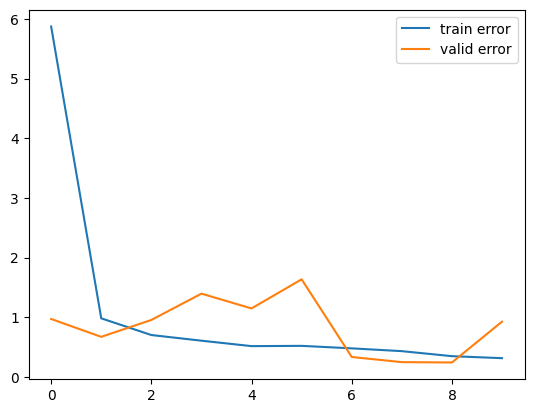

In [9]:
plt.plot(history.history['mean_absolute_error'], label="train error")
plt.plot(history.history['val_mean_absolute_error'], label="valid error")
plt.legend()

In [10]:
random_point = (5,17)
random_point = np.array(random_point).reshape((1,2))
print(model.predict(random_point), "vs", f(random_point))

1/1 [==============================] - 0s 51ms/step
[[49.54871]] vs [48.40313737]


In [11]:
Y_pred = model.predict(X[:10000])

313/313 [==============================] - 0s 1ms/step


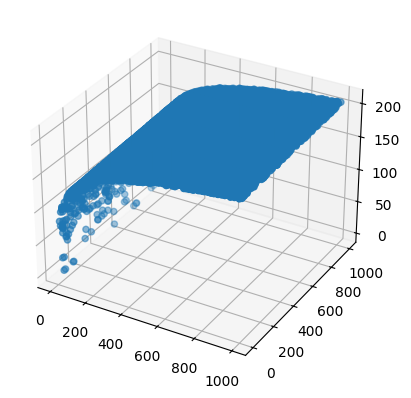

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:10_000,0], X[:10_000,1], Y_pred[:10_000])